# YouTube Streamers Analysis

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\AASTHA\Downloads\youtubers_df.csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [4]:
df.shape

(1000, 9)

In [5]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [7]:
#Drop Rows with missing values

df = df.dropna()

In [8]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

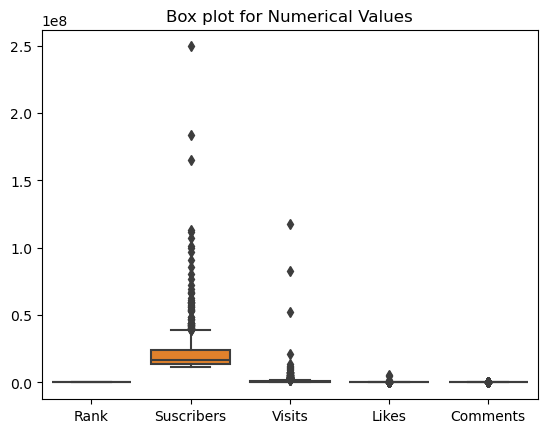

In [9]:
# Check for outliers using boxplots (For numerical values)

sns.boxplot(data=df)
plt.title("Box plot for Numerical Values")
plt.show()

In [10]:
#Define a function to remove outliers using the z-score method for multiple columns

from scipy.stats import zscore
def remove_outliers_zscore(dataframe, columns, threshold=3):
    df_no_outliers = dataframe.copy()
    for column in columns:
        z_scores = zscore(df_no_outliers[column])
        df_no_outliers = df_no_outliers[(z_scores < threshold) & (z_scores > -threshold)]
    return df_no_outliers

#Choose columns to remove outliers from (e.g. Suscribers, Visits, Likes, Rank)

columns_to_clean = ['Suscribers', 'Visits', 'Likes', 'Rank']
df = remove_outliers_zscore(df, columns_to_clean)

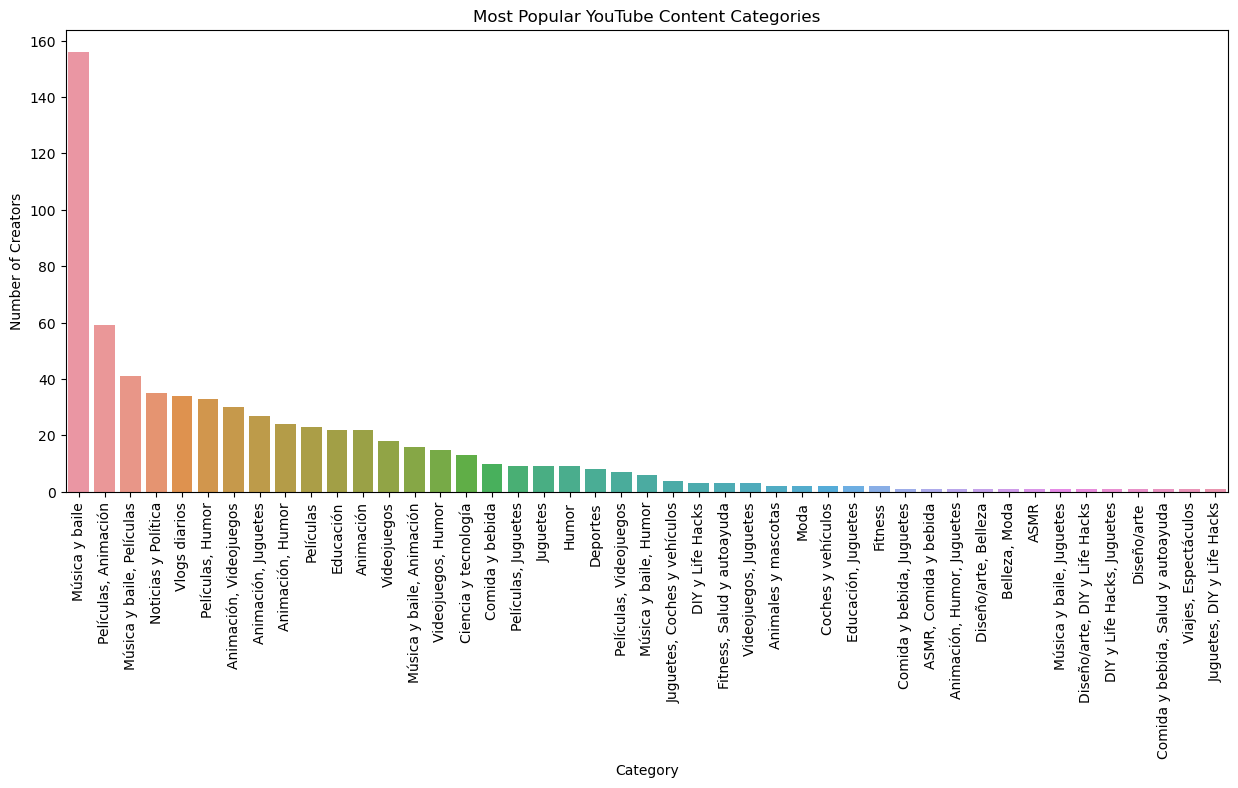

In [12]:
#To identify the most popular categories

category_counts = df['Categories'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Most Popular YouTube Content Categories")
plt.xlabel("Category")
plt.ylabel("Number of Creators")
plt.show()

In [14]:
#The Correlation between Subscribers, Likes, and Comments

corr_likes = np.corrcoef(df['Suscribers'], df['Likes']) [0,1]
corr_comments = np.corrcoef(df['Suscribers'], df['Comments']) [0,1]
print(f'Correlation b/w Subscribers and Likes: {corr_likes}')
print(f'Correlation b/w Subscribers and Comments: {corr_comments}')

Correlation b/w Subscribers and Likes: 0.07958997301642448
Correlation b/w Subscribers and Comments: 0.019905291465977828


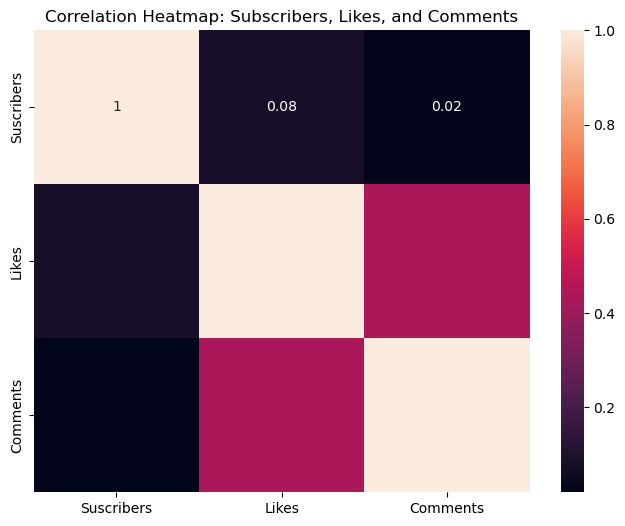

In [18]:
#The Correlation between Subscribers, Likes, and Comments

correlation = df[['Suscribers', 'Likes', 'Comments']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap: Subscribers, Likes, and Comments")
plt.show()

## Audience Study

In [62]:
#To count the number of creators in each combination

category_country_counts = df.groupby(['Categories', 'Country'])['Categories'].count().reset_index(name='Count')
category_country_counts


,Categories,Country,Count
0,ASMR,Estados Unidos,1
1,"ASMR, Comida y bebida",Estados Unidos,1
2,Animación,Argentina,1
3,Animación,Brasil,3
4,Animación,Estados Unidos,4
...,...,...,...
163,Vlogs diarios,India,12
164,Vlogs diarios,Indonesia,1
165,Vlogs diarios,Pakistán,1
166,Vlogs diarios,Turquía,2


In [63]:
country_visit_count = df.groupby('Country')['Visits'].sum().reset_index()
country_visit_count

,Country,Visits
0,Arabia Saudita,3474500.0
1,Argelia,333500.0
2,Argentina,6371400.0
3,Bangladesh,100700.0
4,Brasil,18643600.0
5,Colombia,6256400.0
6,Egipto,305400.0
7,España,1984300.0
8,Estados Unidos,207221500.0
9,Filipinas,8914600.0


In [70]:
#Create a pivot table for better visualization

pivot_table = category_country_counts.pivot(index='Categories', columns='Country', values='Count')


C:\Users\AASTHA\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(70.2222222222222, 0.5, 'Category')

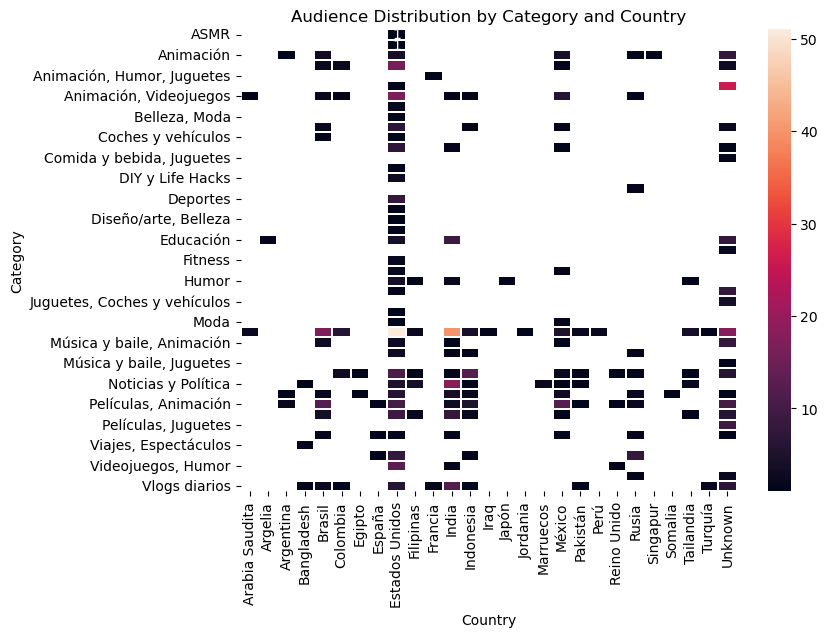

In [73]:
#Heatmap for streamers audiences by country and category

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, linewidths=0.3)
plt.title("Audience Distribution by Category and Country")
plt.xlabel("Country")
plt.ylabel("Category")

# Performance Metrics

In [74]:
# To caculate the average metrics

average_metrics= df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Suscribers'),
  Text(1, 0, 'Visits'),
  Text(2, 0, 'Likes'),
  Text(3, 0, 'Comments')])

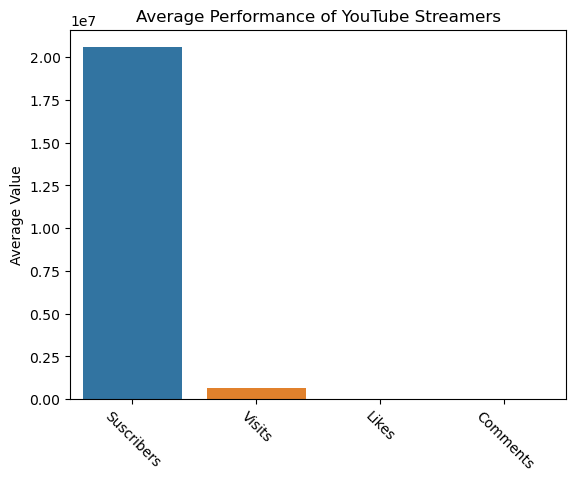

In [75]:
#Barplot of average metrics

sns.barplot(x=average_metrics.index, y=average_metrics.values)
plt.title("Average Performance of YouTube Streamers")
plt.ylabel("Average Value")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Suscribers'),
  Text(1, 0, 'Visits'),
  Text(2, 0, 'Likes'),
  Text(3, 0, 'Comments')])

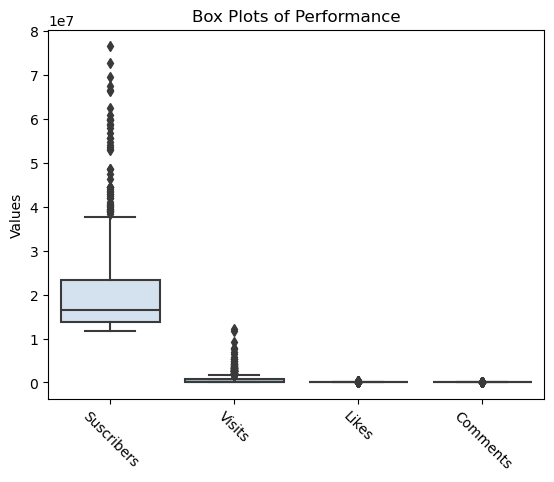

In [79]:
#For patterns in the metrics

sns.boxplot(data=df[['Suscribers', 'Visits', 'Likes', 'Comments']], palette="Blues")
plt.title("Box Plots of Performance")
plt.ylabel("Values")
plt.xticks(rotation=-45)

# Distribution of content categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Música y baile'),
  Text(1, 0, 'Películas, Animación'),
  Text(2, 0, 'Música y baile, Películas'),
  Text(3, 0, 'Noticias y Política'),
  Text(4, 0, 'Vlogs diarios'),
  Text(5, 0, 'Películas, Humor'),
  Text(6, 0, 'Animación, Videojuegos'),
  Text(7, 0, 'Animación, Juguetes'),
  Text(8, 0, 'Animación, Humor'),
  Text(9, 0, 'Películas'),
  Text(10, 0, 'Educación'),
  Text(11, 0, 'Animación'),
  Text(12, 0, 'Videojuegos'),
  Text(13, 0, 'Música y baile, Animación'),
  Text(14, 0, 'Videojuegos, Humor'),
  Text(15, 0, 'Ciencia y tecnología'),
  Text(16, 0, 'Comida y bebida'),
  Text(17, 0, 'Películas, Juguetes'),
  Text(18, 0, 'Juguetes'),
  Text(19, 0, 'Humor'),
  Text(20, 0, 'Deportes'),
  Text(21, 0, 'Películas, Videojuegos'),
  Text(22, 0, 'Música y baile, Humor'),
  Te

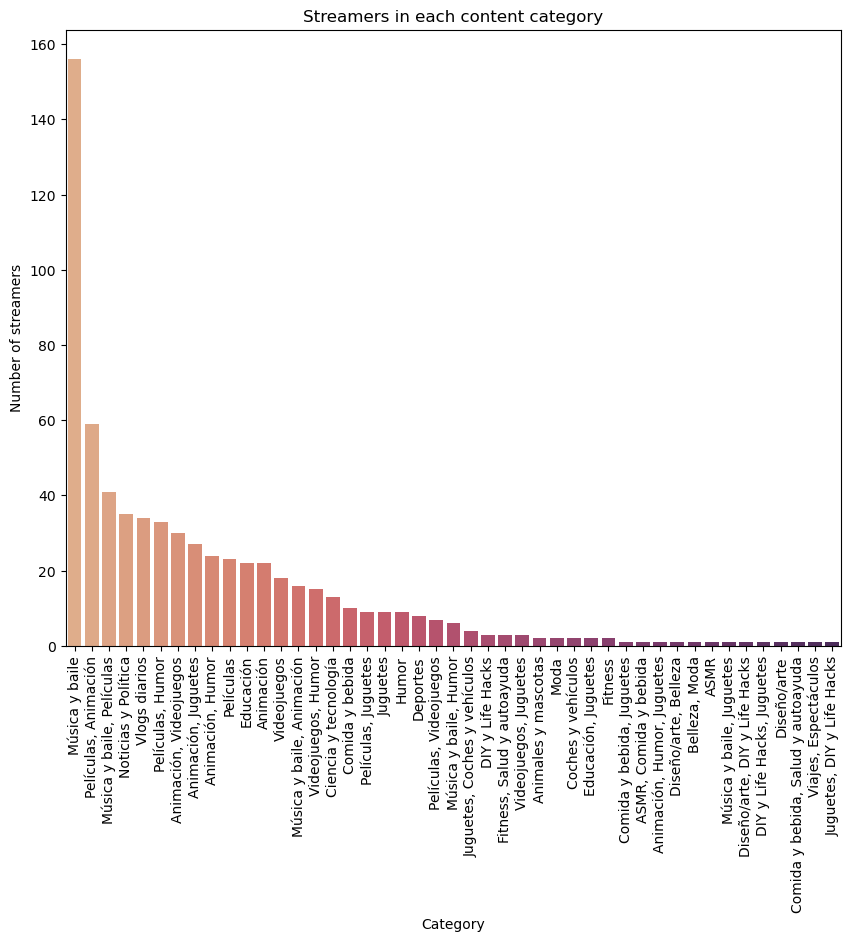

In [82]:
#To calculate category counts
category_counts = df['Categories'].value_counts()

#Create a bar plot to visualize the number of streamers in each category

plt.figure(figsize=(10,8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="flare")
plt.title("Streamers in each content category")
plt.xlabel("Category")
plt.ylabel("Number of streamers")
plt.xticks(rotation=90)

In [84]:
#Identify the category with the highest number of streamers

max_category = category_counts.idxmax()
max_count = category_counts.max()
print(f"The category with the highest number of streamers is '{max_category}' with '{max_count}' streamers")

The category with the highest number of streamers is 'Música y baile' with '156' streamers


Text(50.2222222222222, 0.5, 'Category')

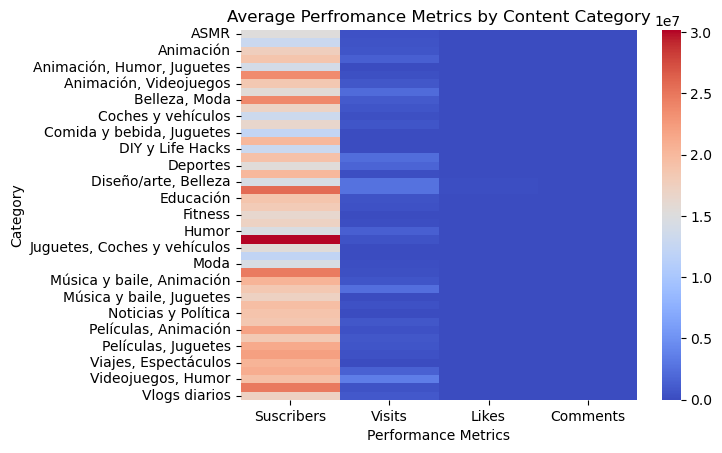

In [85]:
#Calculate average metrics by category
ambc= df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

#Visualize the average performance metrics by category

sns.heatmap(ambc, cmap="coolwarm", fmt=".2f")
plt.title("Average Perfromance Metrics by Content Category")
plt.xlabel("Performance Metrics")
plt.ylabel("Category")


In [86]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

# BenchMarking

In [87]:
#Calculate average values for each metric

avg_subscribers = df['Suscribers'].mean()
avg_visits = df['Visits'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

In [89]:
# Identify streamers with above-average performance

above_avg_streamers = df[
    (df['Suscribers'] > avg_subscribers) &
    (df['Visits'] > avg_visits) &
    (df['Likes'] > avg_likes) &
    (df['Comments'] > avg_comments) 
]

In [93]:
#Display information about the top-performing streamers

top_performing_streamers = above_avg_streamers.sort_values(by=['Suscribers'], ascending=True)
print("Top Performing Streamers:")
print(top_performing_streamers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Top Performing Streamers:
               Username  Suscribers      Visits     Likes  Comments
319               romeo  21100000.0   3200000.0   53900.0    1600.0
315      lyricalemonade  21100000.0   2800000.0  127300.0    5800.0
318          kurzgesagt  21100000.0   4900000.0  253500.0   14000.0
304            infinite  21700000.0    884800.0   45700.0    1400.0
302          royaltyfam  21900000.0   4700000.0   67000.0    6600.0
285          BenAzelart  22500000.0   3700000.0   44900.0    2700.0
281             SSundee  22700000.0   1700000.0   59800.0    1800.0
278         StokesTwins  22700000.0  11700000.0  235000.0   10000.0
272       AmiRodrigueZZ  22900000.0   4300000.0  294400.0    1300.0
243        JamesCharles  23900000.0    964500.0   62300.0    1100.0
241  juandediospantojaa  24000000.0   3000000.0  133200.0    3600.0
234                 rug  24300000.0   3200000.0   85300.0    5100.0
207               ZHCYT  25700000.0   2600000.0  127300.0    2200.0
206           AlejoIgo

# Content Recommendations

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [96]:
df['user_id']=range(1,len(df['Username'])+1)

In [97]:
x=df[['Rank', 'Visits', 'Comments']]
y=df['user_id']

In [98]:
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [99]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred=model.predict(x_test)
y_pred

array([5.27160366e+02, 5.03565524e+02, 2.85286090e-01, 2.07903591e+02,
       3.85044522e+02, 3.54755149e+01, 4.22149805e+01, 4.22685243e+02,
       3.46652469e+02, 1.09055785e+02, 5.85066567e+02, 1.53245897e+02,
       2.90071029e+02, 4.30163688e+02, 1.93760602e+02, 6.27516042e+02,
       5.23781535e+02, 1.04844846e+02, 2.72564306e+02, 1.25060195e+02,
       8.80147594e+01, 4.84054234e+02, 5.08190655e+02, 5.13688087e+02,
       3.02199752e+02, 5.16343414e+01, 6.26838552e+02, 4.95504278e+02,
       3.81287785e+01, 5.70940298e+02, 5.35231069e+02, 5.02202383e+02,
       1.82261150e+02, 1.35832085e+02, 1.75575313e+02, 1.33134005e+02,
       5.25776763e+02, 1.77594844e+02, 2.15309730e+02, 1.47955642e+02,
       5.32537384e+02, 1.54018891e+02, 3.61535884e+01, 5.66222433e+02,
       6.14046168e+02, 6.16726371e+02, 6.18761276e+02, 3.43231795e+02,
       3.94468030e+02, 4.61818891e+02, 4.20741021e+02, 5.62857847e+02,
       6.25476570e+02, 6.28190399e+02, 6.22795320e+02, 2.16491378e+02,
      

In [103]:
#Calculate the performance metrics

mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

#Display the metrics

print(f"Mean Absolute Error (MAE){mae}")
print(f"Mean Squared Error (MSE){mse}")
print(f"R-Squared (R2){r2}")

Mean Absolute Error (MAE)2.1433747412581585
Mean Squared Error (MSE)7.1839602009039885
R-Squared (R2)0.9998056468217383


In [106]:
#Functions to recommend streamers based on category and performance metrics

def recommendation_streamers_system(categories, performance_threshold):
     recommended_streamers = df[(df['Categories']== categories) & df['performanceMetrics']]
     return recommend_streamers
print(recommendation_streamers_system)

<function recommendation_streamers_system at 0x000001EE128BC360>


# Conclusion